importing initial relevant libraries

In [1]:
import pandas as pd
import numpy as np

# Data Loading

In [2]:
data=pd.read_csv("ps2_public.csv")

In [3]:
data.head()

,treatment,age,blood_pressure,gender,blood_test,family_history,TestA,TestB,GeneC,GeneD,GeneE,GeneF
0,0,64,103.820809,non-female,negative,False,4.334376,0.324374,not active,1,1,0
1,0,52,107.071369,female,negative,False,0.361847,-0.213014,active,1,0,0
2,1,55,113.116130,female,positive,False,3.611842,-0.071740,not active,0,0,1
3,0,45,83.760932,female,negative,NaN,-5.282537,-0.237121,active,0,0,0
4,0,58,131.135933,female,negative,False,2.787207,0.195470,not active,0,1,1


# Data Exploration

In [4]:
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.patches import Polygon

In [5]:
data.describe()

,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,0.552533,59.978000,101.023910,3.983448,-0.000590,0.549467,0.550667,0.551200
std,0.497266,8.100115,36.128945,4.162343,0.171500,0.497580,0.497459,0.497405
min,0.000000,29.000000,-999.000000,-11.699344,-0.288422,0.000000,0.000000,0.000000
25%,0.000000,54.000000,91.802997,1.117443,-0.134452,0.000000,0.000000,0.000000
50%,1.000000,60.000000,99.814330,3.991237,-0.027296,1.000000,1.000000,1.000000
75%,1.000000,65.000000,110.095869,6.784449,0.101578,1.000000,1.000000,1.000000
max,1.000000,93.000000,157.471226,21.386412,0.740719,1.000000,1.000000,1.000000


In [6]:
# take out unreasonable outlier cases where blood pressure is -999
data=data.loc[data["blood_pressure"]!=-999]

In [7]:
data.describe()

,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF
count,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000,7493.000000
mean,0.552249,59.980782,102.051558,3.984596,-0.000486,0.549446,0.550781,0.551048
std,0.497296,8.100322,13.224057,4.162921,0.171513,0.497582,0.497448,0.497421
min,0.000000,29.000000,80.099114,-11.699344,-0.288422,0.000000,0.000000,0.000000
25%,0.000000,54.000000,91.811651,1.118284,-0.134448,0.000000,0.000000,0.000000
50%,1.000000,60.000000,99.822705,3.991453,-0.027127,1.000000,1.000000,1.000000
75%,1.000000,65.000000,110.117589,6.785461,0.101723,1.000000,1.000000,1.000000
max,1.000000,93.000000,157.471226,21.386412,0.740719,1.000000,1.000000,1.000000


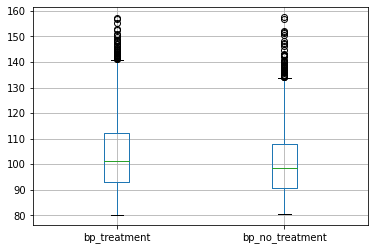

In [8]:
# boxplots comparing blood pressure of patients that received treatment vs. no treatment
bp_treatment=data.loc[data["treatment"]==1,["blood_pressure"]]
bp_no_treatment=data.loc[data["treatment"]==0,["blood_pressure"]]
bp=pd.concat([bp_treatment,bp_no_treatment],axis=1)
bp.columns=["bp_treatment","bp_no_treatment"]
boxplot = bp.boxplot(column=["bp_treatment","bp_no_treatment"])

Text(0.5, 1.0, 'Frequency of treatment based on gender')

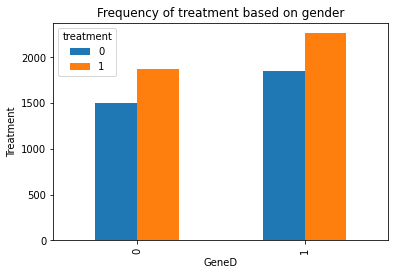

In [9]:
# gender could be a important predictor for treatment
pd.crosstab(data.GeneD,data.treatment).plot(kind="bar")
plt.xlabel("GeneD")
plt.ylabel("Treatment")
plt.title("Frequency of treatment based on gender")

Text(0.5, 1.0, 'Frequency of treatment based on gender')

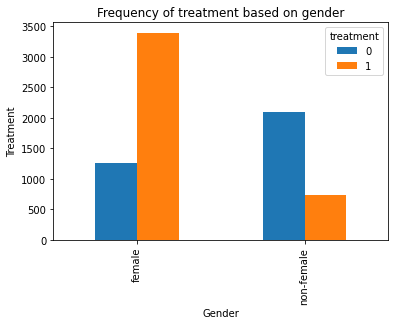

In [10]:
# gender could be a important predictor for treatment
pd.crosstab(data.gender,data.treatment).plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Treatment")
plt.title("Frequency of treatment based on gender")

<AxesSubplot:>

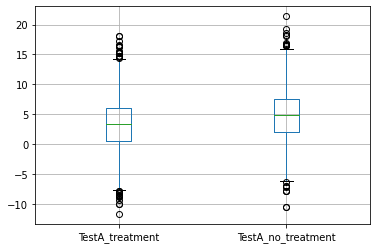

In [11]:
# boxplots comparing Test A results in patients that received treatment vs. no treatment
TestA_treatment=data.loc[data["treatment"]==1,["TestA"]]
TestA_no_treatment=data.loc[data["treatment"]==0,["TestA"]]
TestA=pd.concat([TestA_treatment,TestA_no_treatment],axis=1)
TestA.columns=["TestA_treatment","TestA_no_treatment"]
TestA.boxplot(column=["TestA_treatment","TestA_no_treatment"])

<AxesSubplot:>

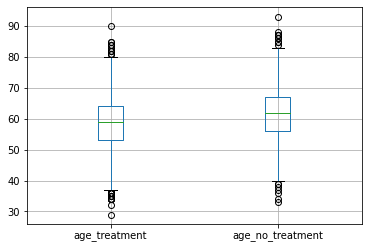

In [12]:
# boxplots comparing age in patients that received treatment vs. no treatment
age_treatment=data.loc[data["treatment"]==1,["age"]]
age_no_treatment=data.loc[data["treatment"]==0,["age"]]
age=pd.concat([age_treatment,age_no_treatment],axis=1)
age.columns=["age_treatment","age_no_treatment"]
age.boxplot(column=["age_treatment","age_no_treatment"])

# Data Processing

In [13]:
data.head()

,treatment,age,blood_pressure,gender,blood_test,family_history,TestA,TestB,GeneC,GeneD,GeneE,GeneF
0,0,64,103.820809,non-female,negative,False,4.334376,0.324374,not active,1,1,0
1,0,52,107.071369,female,negative,False,0.361847,-0.213014,active,1,0,0
2,1,55,113.116130,female,positive,False,3.611842,-0.071740,not active,0,0,1
3,0,45,83.760932,female,negative,NaN,-5.282537,-0.237121,active,0,0,0
4,0,58,131.135933,female,negative,False,2.787207,0.195470,not active,0,1,1


In [14]:
num_col=["treatment","age","blood_pressure","TestA","TestB","GeneD","GeneE","GeneF"]
cat_col=["gender","blood_test","GeneC"]
cat_na="family_history"

In [15]:
# copy numerical columns into new dataframe
num_data=data[num_col]

In [16]:
for x in cat_col:
    print(data[x].unique())

['non-female' 'female']
['negative' 'positive']
['not active' 'active']


In [17]:
cat_data=data[cat_col]

In [18]:
# this code deals with categorical data that has only two variables and no nans
cat_data=pd.get_dummies(cat_data,drop_first=True)

In [19]:
cat_data.head()

,gender_non-female,blood_test_positive,GeneC_not active
0,1,0,1
1,0,0,0
2,0,1,1
3,0,0,0
4,0,0,1


In [20]:
cat_na_data=data[cat_na]
cat_na_data=pd.get_dummies(cat_na_data,drop_first=True,dummy_na=True)

In [21]:
cat_na_data.columns=["family_history_True","family_history_NaN"]
cat_na_data.head()

,family_history_True,family_history_NaN
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0


In [22]:
final_data=pd.concat([num_data,cat_data,cat_na_data],axis=1)

In [23]:
final_data.head()

,treatment,age,blood_pressure,TestA,TestB,GeneD,GeneE,GeneF,gender_non-female,blood_test_positive,GeneC_not active,family_history_True,family_history_NaN
0,0,64,103.820809,4.334376,0.324374,1,1,0,1,0,1,0,0
1,0,52,107.071369,0.361847,-0.213014,1,0,0,0,0,0,0,0
2,1,55,113.116130,3.611842,-0.071740,0,0,1,0,1,1,0,0
3,0,45,83.760932,-5.282537,-0.237121,0,0,0,0,0,0,0,1
4,0,58,131.135933,2.787207,0.195470,0,1,1,0,0,1,0,0


# test train split

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(final_data.drop('treatment',axis=1), 
                                                    final_data['treatment'], 
                                                    test_size=0.20, 
                                                    random_state=42
                                                    )

# Logistic Regression

In [26]:
logmodel=LogisticRegression(solver="liblinear",penalty="l2")
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

# Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf_model = RandomForestClassifier(n_jobs=2, random_state=0)

In [29]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(n_jobs=2, random_state=0)

In [30]:
rf_prediction=rf_model.predict(X_test)

# Evaluation

k-fold cross-validation

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [32]:

def display_scores(scores):
    print("ROC-AUC score:")
    np.set_printoptions(precision=2,suppress=True)
    print(f"scores: {scores}")
    print("mean:", f"{scores.mean():.4f}")
    print("std:", f"{scores.std():.4f}")

In [33]:
# scores for logistic regression
scores=cross_val_score(logmodel,final_data.drop('treatment',axis=1), final_data['treatment'],scoring="roc_auc",cv=10)
display_scores(scores)

ROC-AUC score:
scores: [0.79 0.8  0.79 0.77 0.82 0.82 0.8  0.81 0.81 0.78]
mean: 0.8000
std: 0.0157


In [34]:
# scores for random forest

rf_scores=cross_val_score(rf_model,final_data.drop('treatment',axis=1), final_data['treatment'],scoring="roc_auc",cv=10)
display_scores(rf_scores)

ROC-AUC score:
scores: [0.97 0.96 0.96 0.96 0.97 0.95 0.96 0.96 0.96 0.95]
mean: 0.9593
std: 0.0065


classification scores for logistic model

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       637
           1       0.76      0.81      0.79       862

    accuracy                           0.75      1499
   macro avg       0.74      0.74      0.74      1499
weighted avg       0.75      0.75      0.75      1499



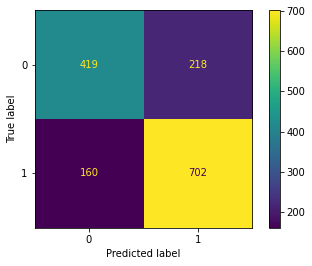

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logmodel, X_test, y_test)

classification scores for random forest

In [37]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       637
           1       0.91      0.89      0.90       862

    accuracy                           0.89      1499
   macro avg       0.88      0.89      0.89      1499
weighted avg       0.89      0.89      0.89      1499



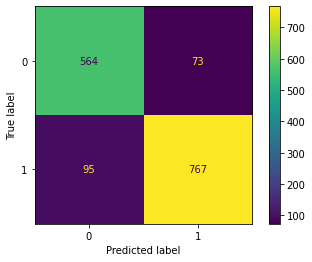

In [38]:
plot_confusion_matrix(rf_model, X_test, y_test)

ROC-AUC for logistic model

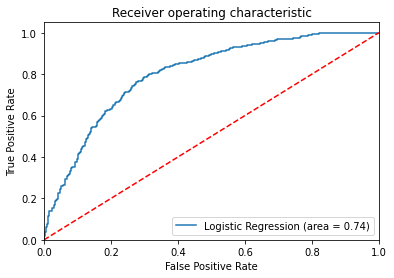

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ROC-AUC for random forest

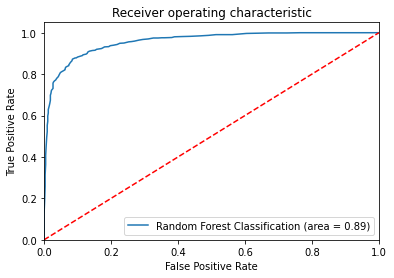

In [54]:
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classification (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('random_ROC')
plt.show()

# Fine-Tuning

Despite that random forest classifier performs so much better than logistic regression, we still choose to use logistic regression as our final model for this report due to the model's high interpretability.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
penalty=["l1", "l2", "elasticnet", "none"]
solver=["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

In [43]:

param_grid = dict(penalty=penalty,solver=solver)
grid = GridSearchCV(estimator=logmodel, param_grid=param_grid, scoring='roc_auc', verbose=3, n_jobs=-1,cv=10)
grid_result = grid.fit(final_data.drop('treatment',axis=1), final_data['treatment'])

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/Users/wingyan01pd2016/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [ nan  nan 0.8   nan 0.79 0.8  0.8  0.8  0.8  0.79  nan  nan  nan  nan
  nan 0.8  0.8   nan 0.8  0.79]
  warnings.warn(


In [44]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.8000092880427809
Best Params:  {'penalty': 'l2', 'solver': 'liblinear'}


# Final model after fine-tuning

In [45]:
final_model=LogisticRegression(solver="liblinear",penalty="l1")
final_model.fit(X_train,y_train)
final_pred = final_model.predict(X_test)

In [46]:
final_scores=cross_val_score(final_model,final_data.drop('treatment',axis=1), final_data['treatment'],scoring="roc_auc",cv=10)
display_scores(final_scores)

/Users/wingyan01pd2016/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wingyan01pd2016/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/wingyan01pd2016/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


ROC-AUC score:
scores: [0.79 0.8  0.79 0.77 0.82 0.83 0.8  0.81 0.81 0.78]
mean: 0.7999
std: 0.0160


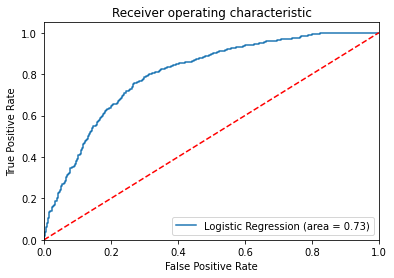

In [56]:
final_roc_auc = roc_auc_score(y_test, final_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % final_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('final_ROC')
plt.show()

# Feature Importance

In [48]:
from matplotlib import pyplot

In [49]:
importance = final_model.coef_[0]

In [50]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.05140
Feature: 1, Score: 0.02417
Feature: 2, Score: -0.02897
Feature: 3, Score: -1.33111
Feature: 4, Score: -0.05396
Feature: 5, Score: -0.28476
Feature: 6, Score: -0.11366
Feature: 7, Score: -2.25971
Feature: 8, Score: -0.27653
Feature: 9, Score: 0.00000
Feature: 10, Score: 2.44831
Feature: 11, Score: 0.07237


3 features, reduction of 75.00%


<AxesSubplot:>

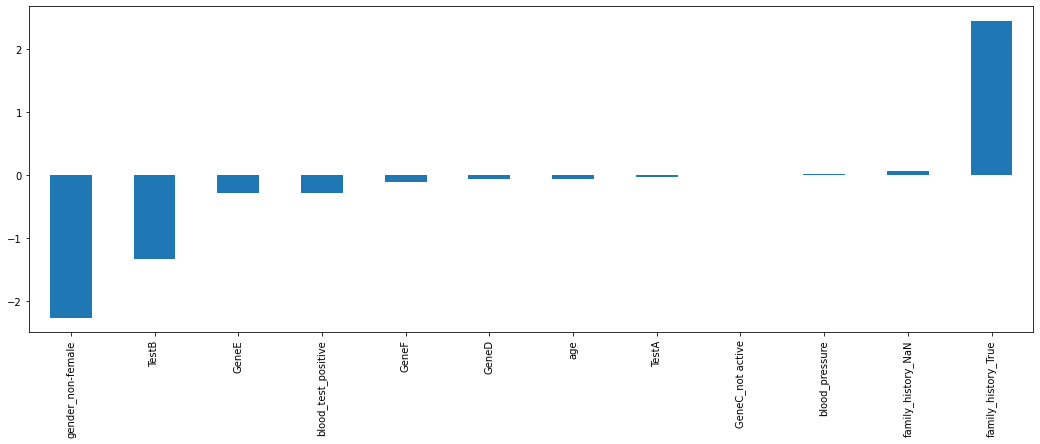

In [51]:
# display feature importance with positive and negative values
feature_importance = pd.Series(index = final_data.drop("treatment",axis=1).columns, data = importance)
n_selected_features = (feature_importance>0).sum()
print('{0} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

11 features, reduction of 8.33%


<AxesSubplot:>

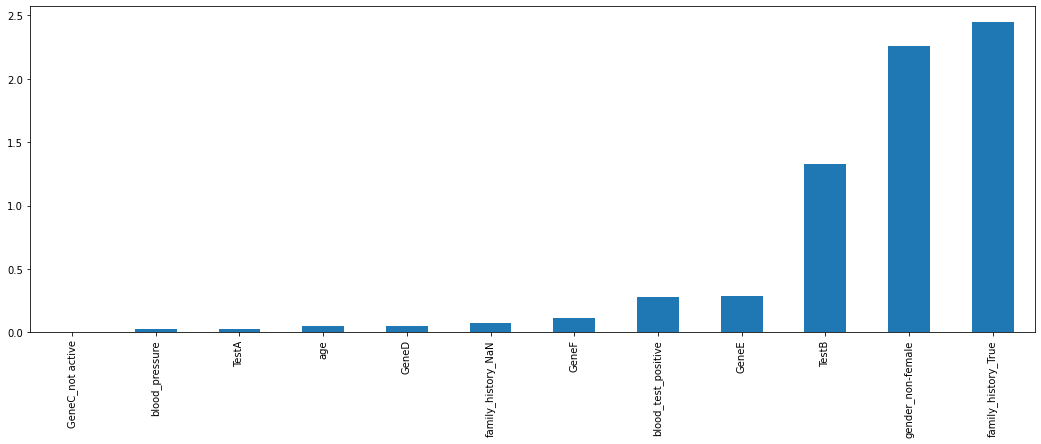

In [52]:
# display feature importance with absolute values
feature_importance = pd.Series(index = final_data.drop("treatment",axis=1).columns, data = abs(importance))
n_selected_features = (feature_importance>0).sum()
print('{0} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

# Testing for Multicollinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [65]:
features=final_data.drop(["treatment"],axis=1)
target=final_data["treatment"]

In [67]:
vif=pd.DataFrame()
vif["features"]=features.columns

In [79]:
vif["VIF_score"]=[variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

In [77]:
vif

,features,VIF_score
0,age,82.362303
1,blood_pressure,56.072473
2,TestA,5.064502
3,TestB,1.001607
4,GeneD,2.217082
5,GeneE,2.223783
6,GeneF,2.226234
7,gender_non-female,1.611693
8,blood_test_positive,1.095354
9,GeneC_not active,2.225147
